In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np

In [12]:
wolfr = pd.read_csv('archivos/catalogo_final_con_colores.csv')
muestrac = pd.read_csv('archivos/datos finales/muestra_representativa.csv')
candidatos_sin_col = pd.read_csv('archivos/datos finales/predicciones_filtradas.csv')
muestra_completa = pd.read_csv('archivos/estrellas aleatorias por colores/muestra_con_simbad.csv')
wolfr = wolfr[wolfr['parallax'] > 0]
wolfr.shape

C:\Users\diego\AppData\Local\Temp\ipykernel_10740\1463693038.py:4: DtypeWarning: Columns (189) have mixed types. Specify dtype option on import or set low_memory=False.
  muestra_completa = pd.read_csv('archivos/estrellas aleatorias por colores/muestra_con_simbad.csv')


(333, 35)

In [5]:
print(list(muestra_completa.columns))
muestra_completa.shape

['Unnamed: 0', 'source_id', 'solution_id', 'designation', 'source_id.1', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr', 'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr', 'astrometric_matched_transits', 'visibility_periods_used', 'astrometric_sigma5d_max', 'matched_transi

(196842, 212)

In [6]:
match = pd.merge(muestra_completa, candidatos_sin_col, on='source_id', how='inner')
match['GAIA_G-GAIA_BP'] = match['GAIA_G'] - match['GAIA_BP']
match['GAIA_G-GAIA_RP'] = match['GAIA_G'] - match['GAIA_RP']
match['GAIA_BP-GAIA_RP'] = match['GAIA_BP'] - match['GAIA_RP']
match['J-H'] = match['J'] - match['H']
match['J-K'] = match['J'] - match['K']
match['H-K'] = match['H'] - match['K']

match.to_csv('archivos/datos finales/candidatos_con_todo.csv', index=False)

In [7]:
candidatos = pd.read_csv('archivos/datos finales/candidatos_con_todo.csv')
print(list(candidatos.columns))
candidatos.shape

['Unnamed: 0', 'source_id', 'solution_id', 'designation', 'source_id.1', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr', 'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr', 'astrometric_matched_transits', 'visibility_periods_used', 'astrometric_sigma5d_max', 'matched_transi

(270, 219)

In [8]:
colores = ['GAIA_G-GAIA_BP', 'GAIA_G-GAIA_RP', 'GAIA_BP-GAIA_RP', 'J-H', 'J-K', 'H-K', 'parallax']
print(candidatos[colores].isnull().sum())

GAIA_G-GAIA_BP     0
GAIA_G-GAIA_RP     0
GAIA_BP-GAIA_RP    0
J-H                0
J-K                0
H-K                0
parallax           0
dtype: int64


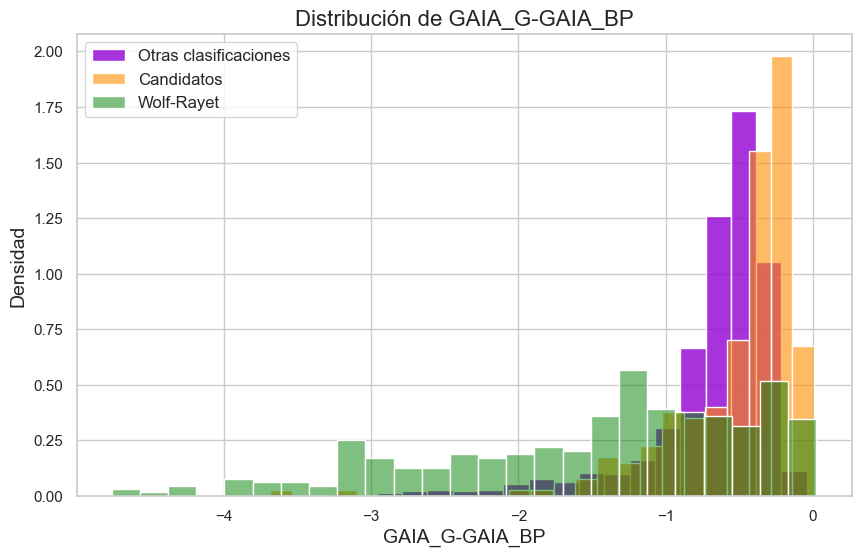

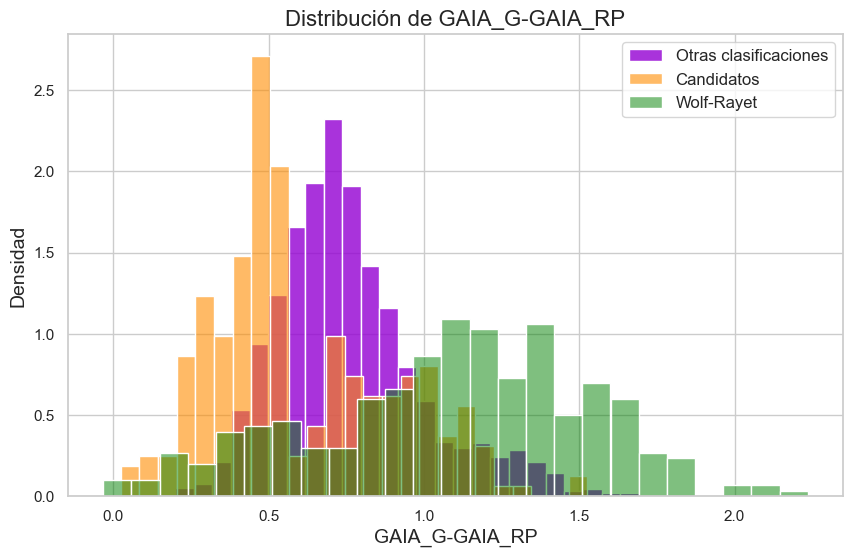

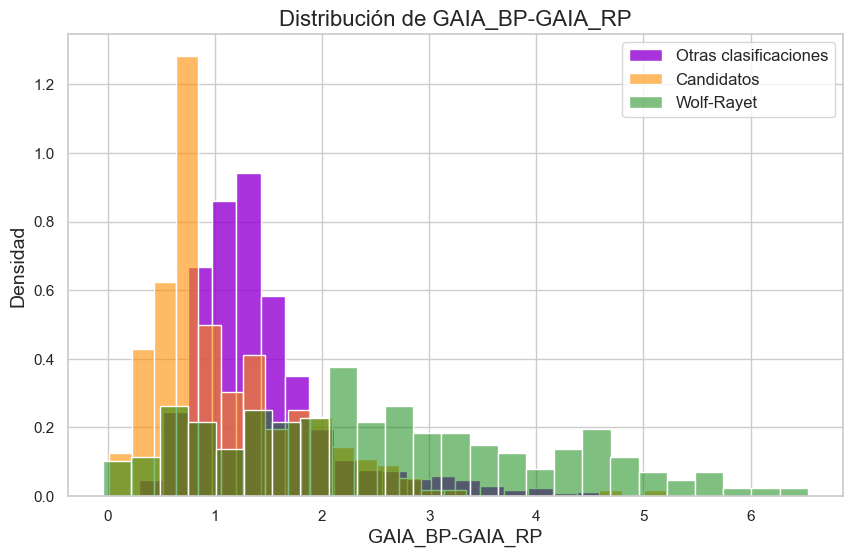

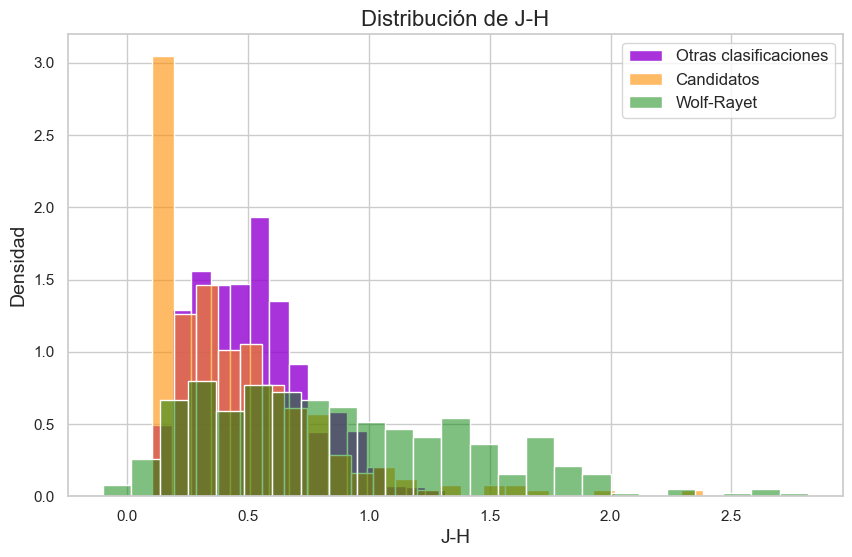

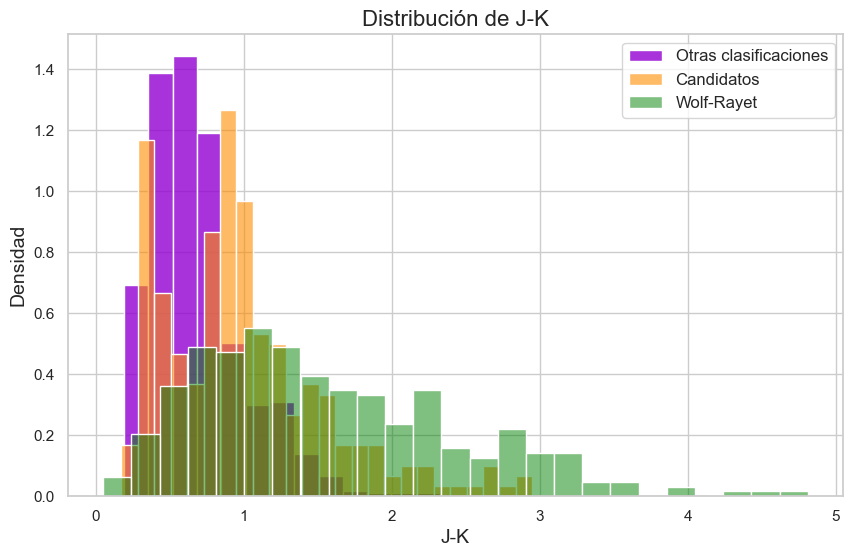

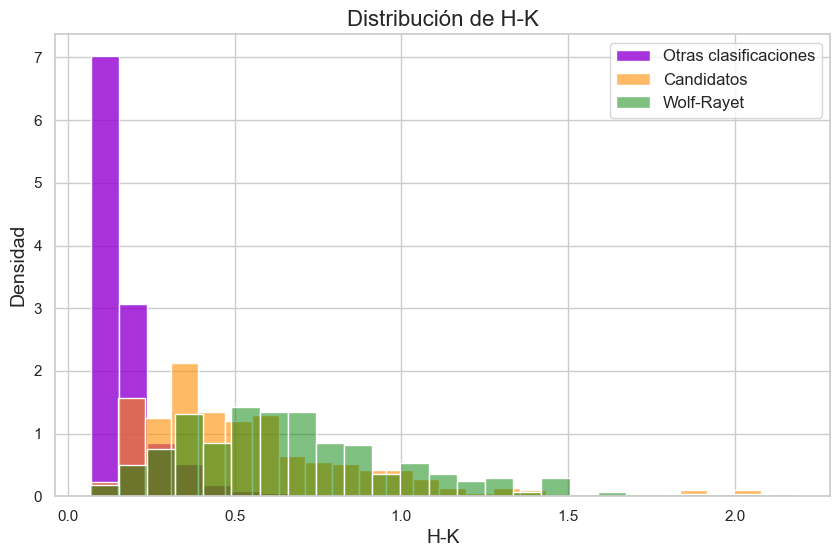

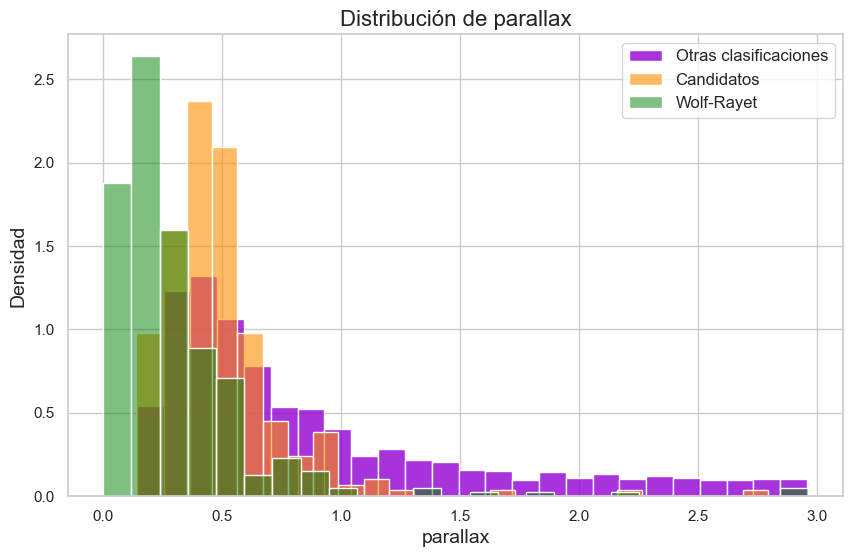

In [11]:
for color in colores:
    plt.figure(figsize=(10, 6))
    
    sns.set(style="whitegrid")
    
    sns.histplot(muestrac[color], bins=25, label='Otras clasificaciones', color='darkviolet', stat="density", alpha=0.8)
    sns.histplot(candidatos[color], bins=25, label='Candidatos', color='darkorange', stat="density", alpha=0.6)
    sns.histplot(wolfr[color], bins=25, label='Wolf-Rayet', color='green', stat="density", alpha=0.5)
    
    plt.title(f'Distribución de {color}', fontsize=16)
    plt.xlabel(color, fontsize=14)
    plt.ylabel('Densidad', fontsize=14)
    plt.legend(fontsize=12)
    plt.savefig(f'graficos/histogramas/Con candidatos/{color}_entrenamiento.png')
    plt.show()

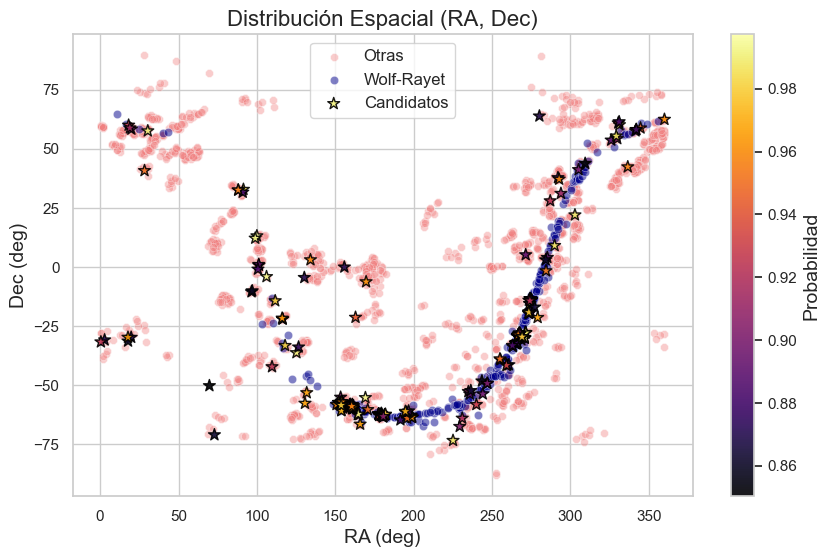

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=muestrac['ra'], y=muestrac['dec'], label='Otras',marker='8', color='lightcoral', alpha=0.4)
sns.scatterplot(x=wolfr['RA_deg'], y=wolfr['Dec_deg'], label='Wolf-Rayet', color='darkblue', alpha=0.5)
sc = plt.scatter(x=candidatos['ra'], y=candidatos['dec'], c=candidatos['ponderacion'], label='Candidatos', cmap='inferno', alpha=0.9, marker='*', s=80, edgecolor='black')
plt.title('Distribución Espacial (RA, Dec)', fontsize=16)
plt.xlabel('RA (deg)', fontsize=14)
plt.ylabel('Dec (deg)', fontsize=14)
plt.legend(fontsize=12)
cbar = plt.colorbar(sc)
cbar.set_label('Probabilidad', fontsize=14)
plt.grid(True)
plt.savefig('graficos/distribucion espacial/distribucion_espacial_RA_Dec_con_candidatos.png')
plt.show()

In [88]:
colores = ['GAIA_G-GAIA_BP', 'GAIA_G-GAIA_RP', 'GAIA_BP-GAIA_RP', 'J-H', 'J-K', 'H-K']
color_combinations = list(combinations(colores, 2))
for color1, color2 in color_combinations:
    plt.figure(figsize=(8,6))
    
    sns.scatterplot(x=muestrac[color1], y=muestrac[color2], label='Otras', color='lightcoral', alpha=0.5, marker='o')
    
    sns.scatterplot(x=wolfr[color1], y=wolfr[color2], label='Wolf-Rayet', color='darkblue', alpha=0.5, edgecolor='black')
    
    sc = plt.scatter(x=candidatos[color1], y=candidatos[color2], c=candidatos['ponderacion'], label='Candidatos',
                     cmap='inferno', alpha=0.9, marker='*', s=80, edgecolor='black')
    
    plt.xlabel(color1)
    plt.ylabel(color2)
    plt.legend(fontsize=12)
    cbar = plt.colorbar(sc)
    cbar.set_label('Probabilidad', fontsize=14)
    plt.grid(True)
    plt.title(f'{color1} vs {color2}')
    plt.savefig(f'graficos/color-color con candidatos/{color1}_vs_{color2}.png')
    plt.close()

# Histogramas de color por tipo de wr

In [13]:
wolfr.columns

Index(['coord_index', 'ID', 'WR#', 'RA_deg', 'Dec_deg', 'G', 'query_ra',
       'query_dec', 'source_id', 'designation', 'ra', 'dec', 'GAIA_G',
       'GAIA_BP', 'GAIA_RP', 'parallax', 'parallax_error', 'distance_deg', 'J',
       'H', 'K', 'Distance (kpc)', 'Galactic Longitude (deg)',
       'Galactic Latitude (deg)', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error',
       'pm', 'GAIA_G-GAIA_BP', 'GAIA_G-GAIA_RP', 'GAIA_BP-GAIA_RP', 'J-H',
       'J-K', 'H-K'],
      dtype='object')

In [15]:
crowther = pd.read_csv('archivos/catalogo crowther limpio/catalogo_convertido_cleaned.csv')

In [16]:
merged_data = pd.merge(wolfr, crowther, on='ID', how='outer')
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]
merged_data.to_csv('archivos/wolfr_crowther_full.csv', index=False)

In [18]:
wolfr_df = pd.read_csv('archivos/wolfr_crowther_full.csv')
print(list(wolfr_df.columns))
wolfr_df.shape

['coord_index', 'ID', 'WR#_x', 'RA_deg_x', 'Dec_deg_x', 'G_x', 'query_ra', 'query_dec', 'source_id', 'designation', 'ra', 'dec', 'GAIA_G', 'GAIA_BP', 'GAIA_RP', 'parallax', 'parallax_error', 'distance_deg', 'J_x', 'H_x', 'K_x', 'Distance (kpc)_x', 'Galactic Longitude (deg)_x', 'Galactic Latitude (deg)_x', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error', 'pm', 'GAIA_G-GAIA_BP', 'GAIA_G-GAIA_RP', 'GAIA_BP-GAIA_RP', 'J-H', 'J-K', 'H-K', 'WR#_y', 'Reference', 'HD', 'Alias1', 'Alias2', 'Alias3', 'Right Ascension J2000', 'Declination J2000', 'Galactic Longitude (deg)_y', 'Galactic Latitude (deg)_y', 'Spectral Type', 'Spectral Type Reference', 'Binary Status', 'Binary Status Reference', 'u (WR)', 'b (WR)', 'v (WR)', 'r (WR)', 'U', 'B', 'V', 'G_y', 'J_y', 'H_y', 'K_y', 'Cluster', 'Association', 'Star Forming Region', 'Distance (kpc)_y', 'Distance Reference', 'RA_deg_y', 'Dec_deg_y']


(679, 67)

In [19]:
def extract_spectral_type(spectral_type):
    if spectral_type.startswith('O'):
        return 'O'
    else:
        return spectral_type[:2]  

wolfr_df['Spectral_Type_Abbr'] = wolfr_df['Spectral Type'].apply(extract_spectral_type)
print(wolfr_df[['Spectral Type', 'Spectral_Type_Abbr']])

        Spectral Type Spectral_Type_Abbr
0                WN4b                 WN
1                WN2b                 WN
2               WN3ha                 WN
3               WC5+?                 WC
4                 WC6                 WC
..                ...                ...
674     WN7-8h; WN7ha                 WN
675            WN8(h)                 WN
676            WNE+cc                 WN
677  WC4; WC5; WC6+O8                 WC
678               WN4                 WN

[679 rows x 2 columns]


In [21]:
wolfr_df['Spectral_Type_Abbr'].value_counts()

Spectral_Type_Abbr
WN    372
WC    276
O      18
WO      4
NO      4
WR      3
B1      1
B0      1
Name: count, dtype: int64

In [23]:
entrenadas = wolfr_df[wolfr_df['ID'].isin(wolfr['ID'])]

In [24]:
entrenadas['Spectral_Type_Abbr'].value_counts()

Spectral_Type_Abbr
WN    195
WC    127
O       9
WO      2
Name: count, dtype: int64

In [25]:
entrenadas['Spectral_Type_Abbr'] = entrenadas['Spectral_Type_Abbr'].replace('O', 'WO')

C:\Users\diego\AppData\Local\Temp\ipykernel_10740\1907935127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entrenadas['Spectral_Type_Abbr'] = entrenadas['Spectral_Type_Abbr'].replace('O', 'WO')


In [26]:
entrenadas['Spectral_Type_Abbr'].value_counts()

Spectral_Type_Abbr
WN    195
WC    127
WO     11
Name: count, dtype: int64

In [29]:
WN = entrenadas[entrenadas['Spectral_Type_Abbr'] == 'WN']
WC = entrenadas[entrenadas['Spectral_Type_Abbr'] == 'WC']
WO = entrenadas[entrenadas['Spectral_Type_Abbr'] == 'WO']

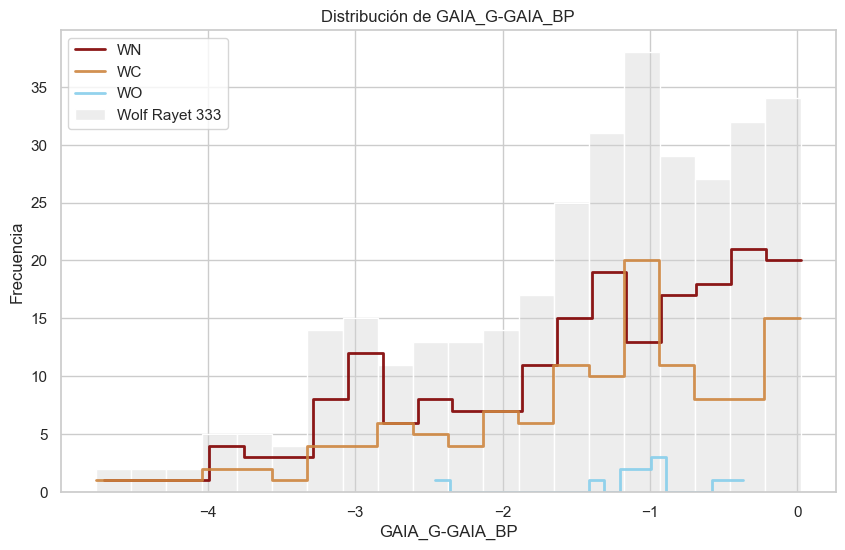

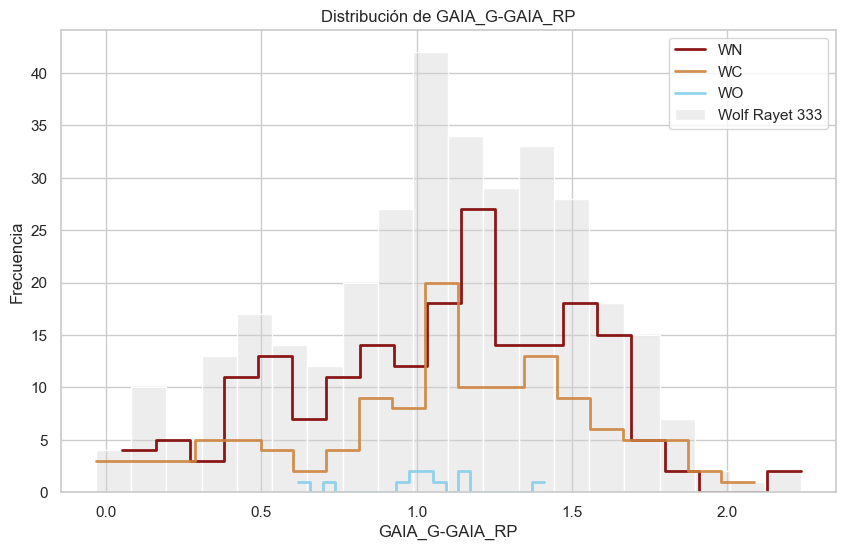

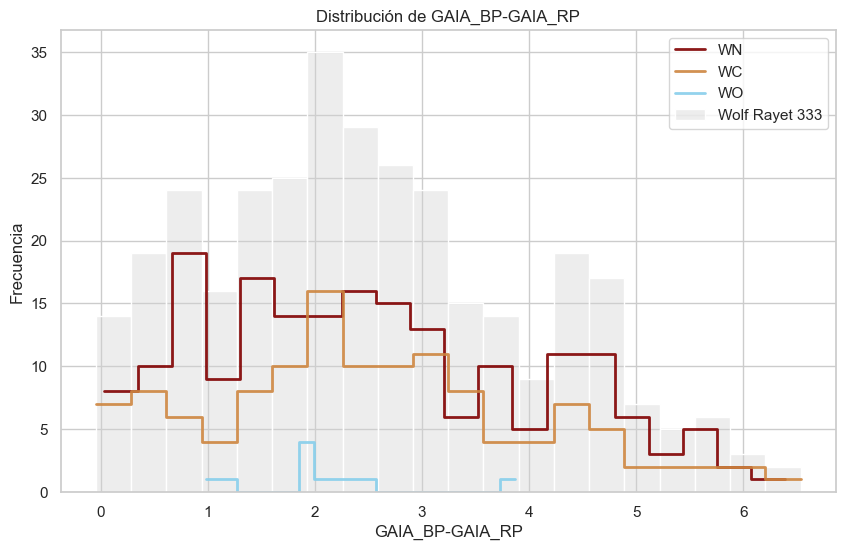

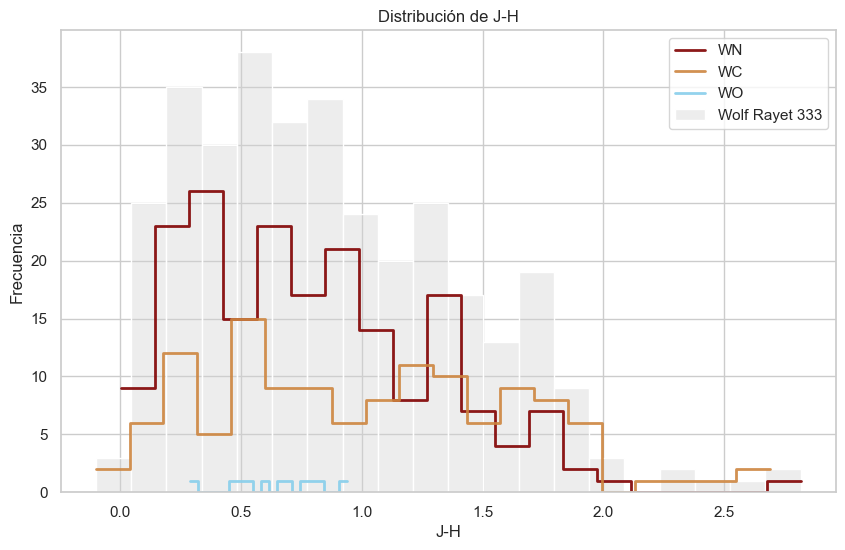

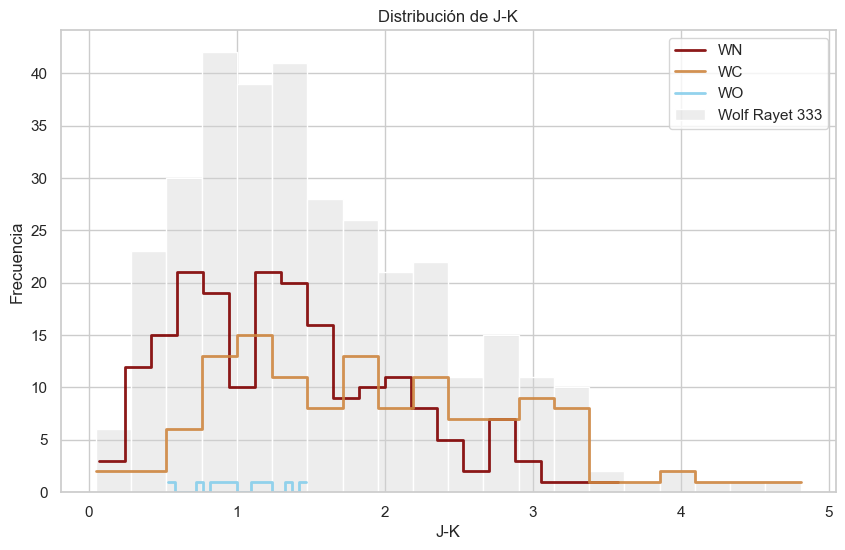

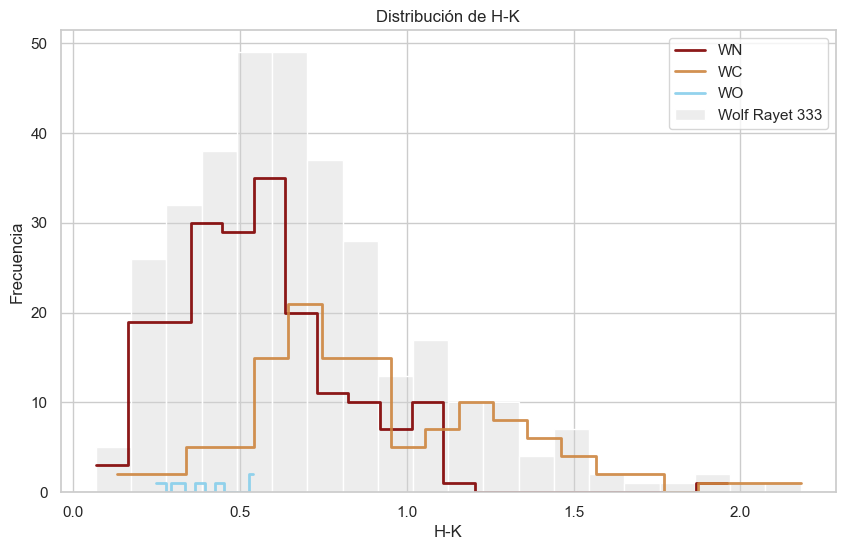

In [38]:
color_columns = ['GAIA_G-GAIA_BP', 'GAIA_G-GAIA_RP', 
                 'GAIA_BP-GAIA_RP', 'J-H', 'J-K', 'H-K']
for color in color_columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(entrenadas[color], bins=20, color='lightgray', label='Wolf Rayet 333', alpha=0.4)
    
    sns.histplot(WN[color], bins=20, color='maroon', label='WN', alpha=0.9, 
                 element='step', fill=False, linewidth=2)
    
    sns.histplot(WC[color], bins=20, color='peru', label='WC', alpha=0.9, 
                 element='step', fill=False, linewidth=2)
    

    sns.histplot(WO[color], bins=20, color='skyblue', label='WO', alpha=0.9, 
                 element='step', fill=False, linewidth=2)
    
    plt.title(f'Distribución de {color}')
    plt.xlabel(color)
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Guardar la figura
    plt.savefig(f'graficos/histogramas/histogramas color por tipos/{color}_hist_muestra.png')
    
    # Mostrar la figura
    plt.show()